# Formatos e compressão de vídeo digital
## Aula 18

* Vimos como vídeos são representados e podem ser manipulados na última aula;
* Entretanto, dados de vídeo (e áudio) sem compressão tendem a ser muito grandes;
* Em HDTV, facilmente excede 1 Gbps;
* Um dos formatos definidos nos Estados Unidos para transmissão é 1920x1080 a 30FPS;
    * Se estes números são multiplicados, considerando 8-bits para cada canal de cor RGB, a taxa total de dados seria 1.5 Gb/s.
* Em prática, compressão é necessária!

## Compressão de vídeo

* Métodos com perda são utilizados visto que as taxas de compressão de métodos sem perda (e.g.: Huffman, LZW) não são altas o suficiente para compressão de vídeos;
* Dois tipos de compressão são comumente utilizados em compressão de vídeo:
    * Remoção de redundância espacial (Spatial Redundancy Removal), como JPEG;
    * Remoção de redundância espacial e temporal (Spatial and Temporal Redundancy Removal), como H.261 e MPEG.

## Compressão H.261

A compressão H.261 pode ser resumida da seguinte forma:

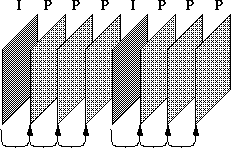

* Dois tipos de quadros (*frames*) são utilizados:
    * Intraquadros (*intraframes*, *I-frames*) e interquadros (*interframes*, *P-frames*);
    * *I-frames* basicamente usam JPEG;
    * *P-frames* usam **pseudo-diferenças** do quadro anterior;
    * *I-frames* nos fornecem um ponto de acesso.

### Codificação intraquadro

* *Intraframes* (*I-frames*); 
* O termo codificação intraquadro (*intra frame coding*) refere-se às várias técnicas de compressão com perda e sem perda usadas **somente no quadro atual**;
* Não usam informação de outros quadros do vídeo;
* Em outras palavras, só usam informação espacial, mas não temporal;
* Normalmente usam técnicas semelhantes àquelas da compressão JPEG.

### Codificação interquadro

<div>
    <table>
        <tr>
            <th>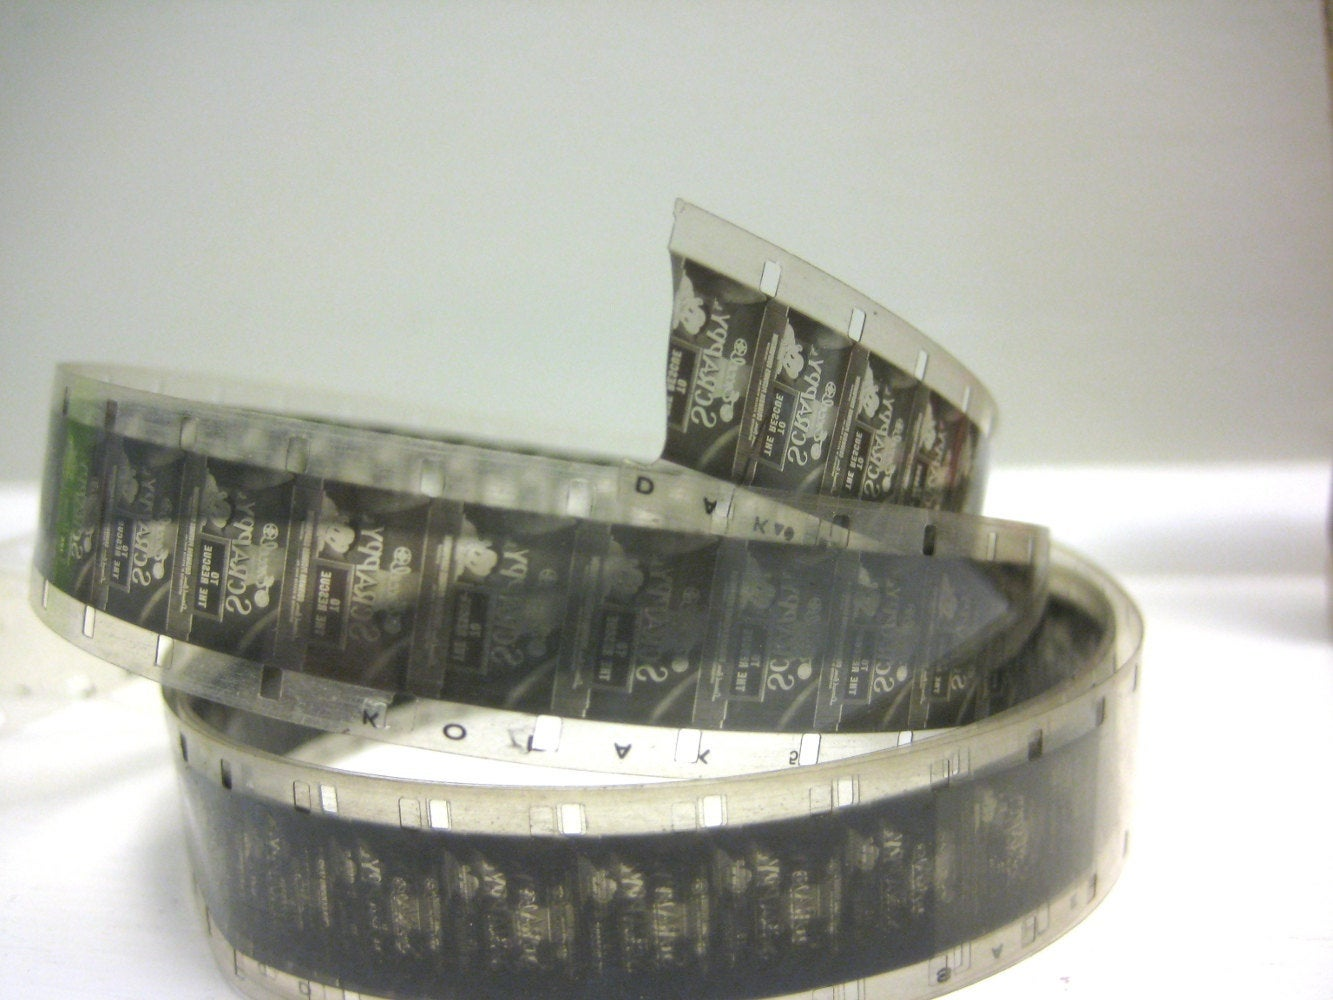</th>
            <th>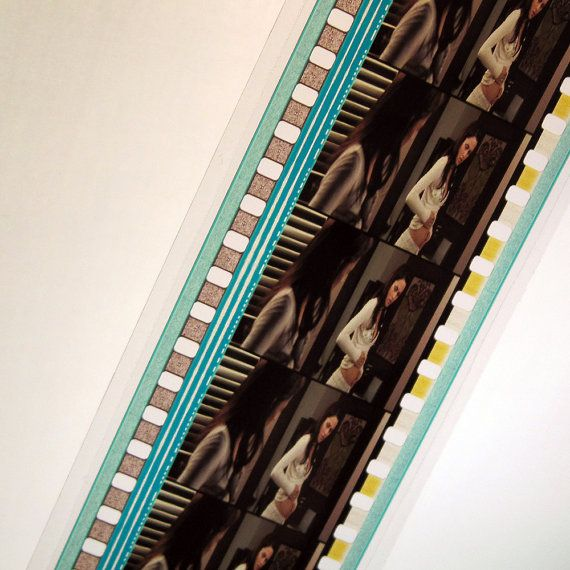</th>
        </tr>
    </table>
</div>

* *Predicted frames* (*P-frames*);
* Podemos usar informação temporal para encontrar redundâncias no vídeo;
* Quadros consecutivos em um vídeo tendem a ser semelhantes;
* Usando estimativa de movimento (*motion estimation*), é possível fazer um processamento temporal com uma técnica chamada **previsão compensada de movimento baseada em bloco** (*block-based motion compensated prediction*);
    * Imagens são divididas em macroblocos;
    * Um algoritmo tenta encontrar se um bloco de uma imagem anterior existe na próxima;
    * Se a maioria dos blocos está presente na próxima imagem (dentro de um limiar), computa-se a diferença entre imagens e ela é salvada como um *P-frame*;
    * Caso contrário, ela é salva como um *I-frame*.

A codificação interquadro pode ser resumida da seguinte forma:

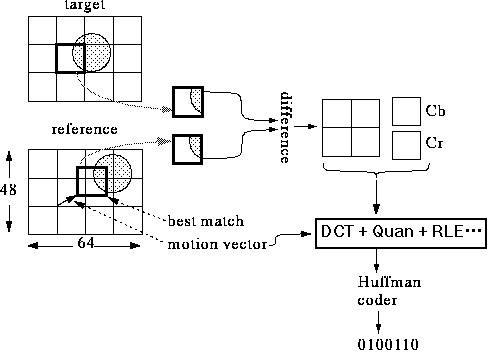

* A imagem anterior é chamada de **imagem referência** (*reference image*);
* A imagem a ser codificada é chamada de **imagem alvo** (*target image*);
* Os blocos mais semelhantes entre imagens são calculados;
* A diferença entre as imagens é codificada.

Como exemplo, começando com o seguinte seguinte quadro:

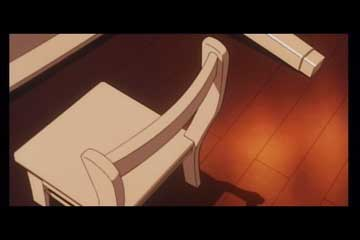

Comparando as diferenças com próximos dois quadros:

|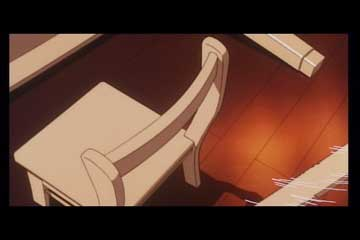|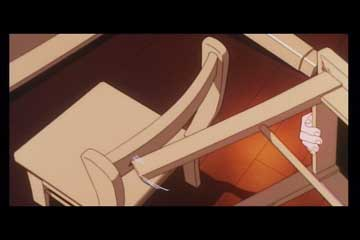|
|-|-|
|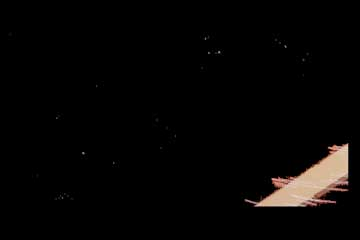|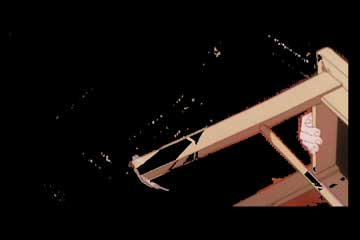|

A única diferença entre os quadros foi a cadeira se movendo, e a codificação intraquadro utiliza deste fato para comprimir as imagens, podendo ser combinada com DCT, quantização, RLE e Huffman para conseguir maiores taxas de compressão.

## Compressão MPEG

* *Moving Picture Expert Group*;
* Semelhante à compressão H.261;
* Contém um terceiro tipo de quadro: **quadro de predição bidirecionalmente interpolado** (*bi-directionally interpolated prediction frame*, *B-frame*);
* *B-frames* procuram por macroblocos em quadros passados e futuros;
* Padrão típico é `IBBPBBPBB IBBPBBPBB IBBPBBPBB`;
    * Padrão pode na verdade variar de acordo com decodificador, e não precisa ser regular.

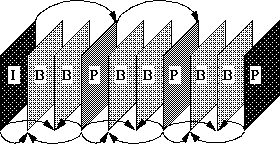

* *B-frames* são mais complexos pois a imagem tem que ser transmitida e armazenada fora de ordem para que um frame futuro esteja disponível para gerar os *B-frames*.

### Resumo



* Um *I-frame* é uma imagem completa, como uma imagem JPEG ou BMP;
* Um *P-frame* armazena apenas as diferenças da imagem a partir do último quadro;
* Um *B-frame* ocupa ainda menos espaço usando as diferenças entre o quadro atual e os quadros anterior e posterior.

# Exercícios

1. Abra o vídeo `carphone.mp4` presente na sua pasta e pegue dois quadros consecutivos (exemplo: 100 e 101). Faça a subtração do segundo quadro com o primeiro. Quantize a imagem resultante (aula 14) com Δ=10. Aplique compressão RLE (aula 13) na imagem resultante e mostre a taxa de compressão (utilize o segundo quadro como original).

Dicas:
* Atente-se a *underflows* ao realizar a subtração. `np.int16` é um `dtype` adequado para armazenar a diferença;
* A quantidade de bytes utilizada em *array* `img` é dada por `img.nbytes`;
* Uma imagem `img` pode ser "achatada" utilizando `img.flatten()` para que seja utilizada no RLE;
* O algoritmo de RLE pode ser adaptado para *arrays* do `NumPy` trocando `not data` por `data.size == 0` e retornando um `np.array` ao final com o `dtype` apropriado.

In [1]:
import matplotlib.pyplot as plt
import moviepy.editor as mpe
import numpy as np

video = mpe.VideoFileClip("carphone.mp4")

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


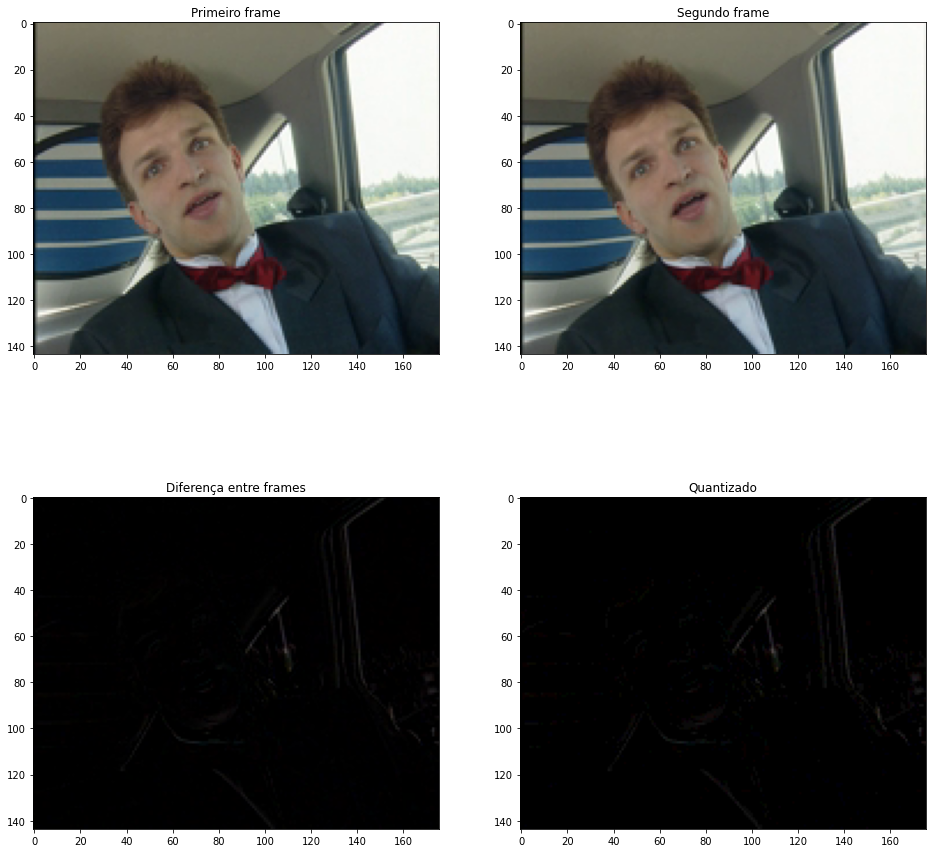

In [2]:
# Extração dos quadros 100 e 101:
frame_number = 100
frame0 = video.get_frame(frame_number / video.fps)
frame1 = video.get_frame((frame_number + 1) / video.fps)

# Diferença entre imagens:
frame_diff = frame1.astype(np.int16) - frame0.astype(np.int16)

# Quantização:
delta = 10
frame_quantized = (delta * np.floor(frame_diff / delta + 0.5)).astype(np.int16)

plt.figure(figsize=(16, 16))
plt.subplot(2, 2, 1)
plt.title("Primeiro frame")
plt.imshow(frame0)

plt.subplot(2, 2, 2)
plt.title("Segundo frame")
plt.imshow(frame1)

plt.subplot(2, 2, 3)
plt.title("Diferença entre frames")
plt.imshow(frame_diff)

plt.subplot(2, 2, 4)
plt.title("Quantizado")
plt.imshow(frame_quantized)

In [3]:
def rle_encode(data):
    encoding = []
    if data.size == 0:
        return encoding

    prev = data[0]
    count = 0

    for value in data:
        if value != prev:
            encoding.append(count)
            encoding.append(prev)

            count = 1
            prev = value
        else:
            count += 1

    encoding.append(count)
    encoding.append(prev)
    return np.array(encoding, dtype=np.int16)

In [4]:
frame_rle = rle_encode(frame_quantized.flatten())

print("Tamanho original:", frame1.nbytes)
print("Tamanho comprimido:", frame_rle.nbytes)
print("Taxa de compressão:", frame1.nbytes / frame_rle.nbytes)

Tamanho original: 76032
Tamanho comprimido: 25152
Taxa de compressão: 3.0229007633587788


2. Desfaça o RLE, some-a com a imagem do primeiro quadro e exiba a imagem.

Dicas:
* O `flatten` pode ser desfeito utilizando `np.reshape(array, shape)`.

In [5]:
?np.reshape

Signature: np.reshape(a, newshape, order='C')
Docstring:
Gives a new shape to an array without changing its data.

Parameters
----------
a : array_like
    Array to be reshaped.
newshape : int or tuple of ints
    The new shape should be compatible with the original shape. If
    an integer, then the result will be a 1-D array of that length.
    One shape dimension can be -1. In this case, the value is
    inferred from the length of the array and remaining dimensions.
order : {'C', 'F', 'A'}, optional
    Read the elements of `a` using this index order, and place the
    elements into the reshaped array using this index order.  'C'
    means to read / write the elements using C-like index order,
    with the last axis index changing fastest, back to the first
    axis index changing slowest. 'F' means to read / write the
    elements using Fortran-like index order, with the first index
    changing fastest, and the last index changing slowest. Note that
    the 'C' and 'F' options ta

In [6]:
def rle_decode(data):
    output = []
    is_repeat = True
    for value in data:
        if is_repeat:
            repeat = value
        else:
            for _ in range(repeat):
                output.append(value)

        is_repeat = not is_repeat

    return np.array(output, dtype=np.int16)

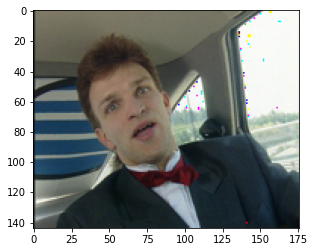

In [7]:
frame_decoded = np.reshape(rle_decode(frame_rle), frame0.shape)
frame_sum = (frame_decoded + frame0).astype(np.uint8)
plt.imshow(frame_sum)

# Referências
* https://users.cs.cf.ac.uk/Dave.Marshall/Multimedia/node245.html
* https://www.animemusicvideos.org/guides/avtech31/theory-videocompression.html
* https://homepages.inf.ed.ac.uk/rbf/CVonline/LOCAL_COPIES/AV0506/s0561282.pdf
* https://softwareengineering.stackexchange.com/questions/165872/what-are-mpeg-i-p-and-b-frames
* https://en.wikipedia.org/wiki/Motion_compensation
* https://en.wikipedia.org/wiki/Video_compression_picture_types

Aula remota, conforme Port. 345/2020 – MEC